In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ss
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_m = pd.read_csv('/content/movies2')
df_r = pd.read_csv('/content/ratings.csv',names=['UserID','MovieID','Rating','Timestamp'])
df_u = pd.read_csv('/content/users.csv',  header=None)

In [4]:
df_m.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_m.columns = ['MovieID','Title','Genres']

In [6]:
df_m['Genres']

0        Animation|Children's|Comedy
1       Adventure|Children's|Fantasy
2                     Comedy|Romance
3                       Comedy|Drama
4                             Comedy
                    ...             
3878                          Comedy
3879                           Drama
3880                           Drama
3881                           Drama
3882                  Drama|Thriller
Name: Genres, Length: 3883, dtype: object

In [7]:
df_m['MovieID']

0          1
1          2
2          3
3          4
4          5
        ... 
3878    3948
3879    3949
3880    3950
3881    3951
3882    3952
Name: MovieID, Length: 3883, dtype: int64

In [8]:
df_r.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
df_r.shape

(421922, 4)

In [10]:
df_r.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
df_u.columns =['UserID','Gender','Age','Occupation','Zip-code']

In [12]:
df_u.shape

(6040, 5)

In [13]:
df_u.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


In [14]:
df_e = pd.merge(df_u,df_r,on='UserID', how='outer')

In [15]:
df_e.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193.0,5.0,978300760.0
1,1,F,1,10,48067,661.0,3.0,978302109.0
2,1,F,1,10,48067,914.0,3.0,978301968.0
3,1,F,1,10,48067,3408.0,4.0,978300275.0
4,1,F,1,10,48067,2355.0,5.0,978824291.0


In [17]:
#Final merged dataframe
df_data = pd.merge(df_e,df_m,on='MovieID',how='outer')

In [18]:
df_data

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1.0,F,1.0,10.0,48067,1193.0,5.0,978300760.0,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,M,56.0,16.0,70072,1193.0,5.0,978298413.0,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,M,25.0,12.0,32793,1193.0,4.0,978220179.0,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,M,25.0,7.0,22903,1193.0,4.0,978199279.0,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,M,50.0,1.0,95350,1193.0,5.0,978158471.0,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
425683,NaN,NaN,NaN,NaN,NaN,3829.0,NaN,NaN,Mad About Mambo (2000),Comedy|Romance
425684,NaN,NaN,NaN,NaN,NaN,3842.0,NaN,NaN,Make Them Die Slowly (Cannibal Ferox) (1980),Horror
425685,NaN,NaN,NaN,NaN,NaN,3856.0,NaN,NaN,Autumn Heart (1999),Drama
425686,NaN,NaN,NaN,NaN,NaN,3881.0,NaN,NaN,Bittersweet Motel (2000),Documentary


In [19]:
df_data.shape

(425688, 10)

pivot table of Users and movies

In [20]:
df_table = pd.pivot_table(df_data,values='Rating',index='MovieID',columns='UserID')
df_table

UserID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,...,2512.0,2513.0,2514.0,2515.0,2516.0,2517.0,2518.0,2519.0,2520.0,2521.0,2522.0,2523.0,2524.0,2525.0,2526.0,2527.0,2528.0,2529.0,2530.0,2531.0,2532.0,2533.0,2534.0,2535.0,2536.0,2537.0,2538.0,2539.0,2540.0,2541.0,2542.0,2543.0,2544.0,2545.0,2546.0,2547.0,2548.0,2549.0,2550.0,2551.0
MovieID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,5.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,3.0,NaN,4.0,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,1.0,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


observation from above pivot table-
 It is clear that Not every user went through rating every single movie


Continuous and categorical features

In [21]:
num_cols = df_data._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df_data[i].unique())) > int(df_data.shape[0]/25):         #Set criteria for continuous features
     cont_cols.append(i)
print ("Continuous feature:\n",cont_cols)

Continuous feature:
 ['Timestamp']


In [22]:
#Unique values of numeric columns
for i in num_cols:
  print(str(i)+ '\t' + str(len(df_data[i].unique())))

UserID	6041
Age	8
Occupation	22
MovieID	3884
Rating	6
Timestamp	186995


In [23]:
cate_cols = list(set(df_data.columns) - set(cont_cols))
print('Categorical features are:\n',cate_cols)

Categorical features are:
 ['Zip-code', 'Genres', 'MovieID', 'Title', 'UserID', 'Rating', 'Age', 'Gender', 'Occupation']


2. **Data cleaning**

Outliers analysis on continuous columns (num_cols) by using box plot

In [24]:
num_cols

Index(['UserID', 'Age', 'Occupation', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

Text(0.5, 1.0, 'Outliers in UserID')

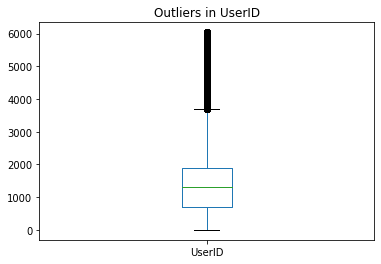

In [25]:
df_data['UserID'].plot.box()  
plt.title('Outliers in UserID')   #Seems good values distribution

Text(0.5, 1.0, 'Outliers in MovieID')

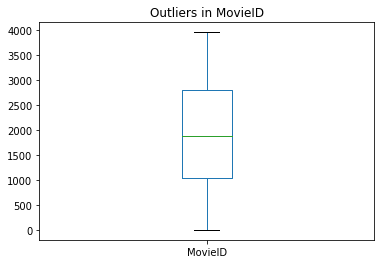

In [26]:
df_data['MovieID'].plot.box()  
plt.title('Outliers in MovieID')  #Since UserID and MovieID are both for identify of user and movie 

Text(0.5, 1.0, 'Outliers in Timestamp')

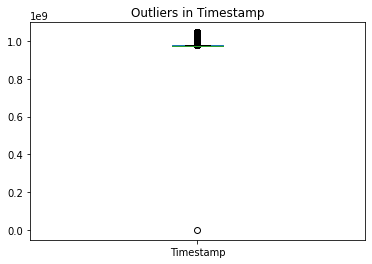

In [27]:
df_data['Timestamp'].plot.box() 
plt.title('Outliers in Timestamp')

Since Timestamp is the only feature having very small number of outliers, we will sort this out later

In [28]:
df_data.describe()

,UserID,Age,Occupation,MovieID,Rating,Timestamp
count,425411.000000,425411.000000,425411.000000,422199.000000,421922.000000,4.219220e+05
mean,1305.597843,29.429728,8.126800,1885.478703,3.562625,9.783196e+08
std,756.063450,12.388424,6.571322,1109.535056,1.121713,1.027800e+07
min,1.000000,1.000000,0.000000,1.000000,1.000000,9.740000e+02
25%,699.000000,25.000000,2.000000,1031.000000,3.000000,9.747318e+08
50%,1297.000000,25.000000,7.000000,1885.000000,4.000000,9.751698e+08
75%,1897.000000,35.000000,14.000000,2797.000000,4.000000,9.764845e+08
max,6040.000000,56.000000,20.000000,3952.000000,5.000000,1.046389e+09


Cheaking null values in our dataset

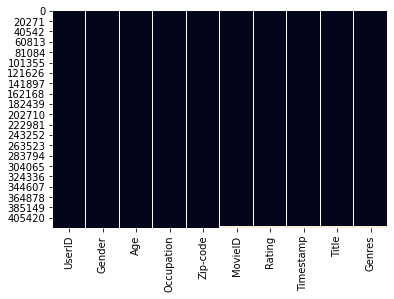

In [56]:
# Heatmap for cheaking null values
ss.heatmap(df_data.isnull(),cbar=False)

No null values in the dataset

In [30]:
#Checking Sparse rows , if >= 33.3% of columns of a record is not populated then remove the record itself
# Found no record Sparsely populated
rows_missing = df_data.isnull().sum(axis=1).reset_index() 
rows_missing.columns = ['row_num','mis_cnt']
removable_row= rows_missing[(rows_missing['mis_cnt'] > int(df_data.shape[1]/3))]     #criteria for removing a row
removable_row

,row_num,mis_cnt
421922,421922,5
421923,421923,5
421924,421924,5
421925,421925,5
421926,421926,5
...,...,...
425683,425683,7
425684,425684,7
425685,425685,7
425686,425686,7


In [31]:
m = list(removable_row['row_num'])    #create a list containing row_num from removable_row
df_d = df_data.drop(m)                #drop the entire rows those having index number in list m

New dataframe df_d after removal null value rows having more than 33.3%

In [32]:
print('Shape of dataframe after removing null values is {}'.format(df_d.shape))  
print('Shape of dataframe before removing null values is {}'.format(df_data.shape)) 

Shape of dataframe after removing null values is (421922, 10)
Shape of dataframe before removing null values is (425688, 10)


In [33]:
df_d

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1.0,F,1.0,10.0,48067,1193.0,5.0,978300760.0,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,M,56.0,16.0,70072,1193.0,5.0,978298413.0,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,M,25.0,12.0,32793,1193.0,4.0,978220179.0,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,M,25.0,7.0,22903,1193.0,4.0,978199279.0,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,M,50.0,1.0,95350,1193.0,5.0,978158471.0,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
421917,2344.0,M,25.0,12.0,2139,790.0,3.0,974413229.0,An Unforgettable Summer (1994),Drama
421918,2440.0,M,50.0,17.0,1430,1915.0,4.0,974221429.0,Voyage to the Beginning of the World (1997),Drama
421919,2453.0,M,25.0,7.0,55429,2833.0,4.0,974189925.0,Lucie Aubrac (1997),Romance|War
421920,2507.0,M,25.0,4.0,94107,1714.0,2.0,975382922.0,Never Met Picasso (1996),Romance


4. **Data visualization**
*Univariate analysis on continuous features*

1. Continuous features ( UserID, MovieID, Timestamp)

Text(0.5, 0, 'UserID(s)')

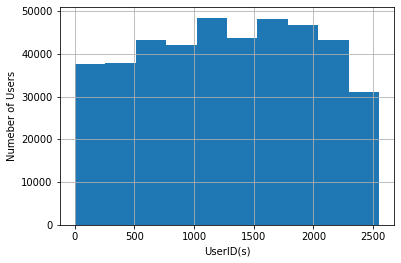

In [34]:
df_d['UserID'].hist()
plt.ylabel('Numeber of Users')
plt.xlabel('UserID(s)')

Observation -
1.  Users having userID(s) between 0.0 to 550.0 are 13000+ in quantity approx judgement~
2. Users having userID between 2200.0 to 3000.0 watch least movies approx 8000+ 

In [35]:
#There are only 6040 Users who rated the different-different movies many times as shown in above hist graph
df_d.groupby(['UserID'])['Rating'].count()

UserID
1.0        53
2.0       129
3.0        51
4.0        21
5.0       198
         ... 
2547.0    139
2548.0     43
2549.0     23
2550.0     94
2551.0     69
Name: Rating, Length: 2551, dtype: int64

Text(0.5, 0, 'MovieID(s)')

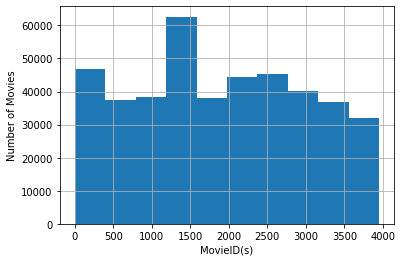

In [36]:
df_d['MovieID'].hist()
plt.ylabel('Number of Movies')
plt.xlabel('MovieID(s)')

observations -
1. Movies having movieID between 1200.0 to 1600.0 have been watched 160000+ times by users
2. Movies having movieID something between 3550.0 to 3900.0 have not been watched so much which shows these can be stand at last in our popularity based recommendation system (for cold start problem)

Text(0.5, 0, 'Time taken by user to rate a movie')

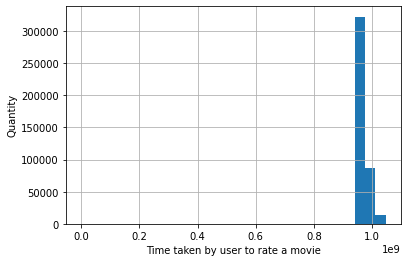

In [37]:
df_d['Timestamp'].hist(bins=30)
plt.ylabel('Quantity')
plt.xlabel('Time taken by user to rate a movie')

Observations -
1. There are huge amount of usesr who take approx~0.1(in ln10) to rate a particular movie(   doesn't make any sense)

2. Categorical features ('Rating', 'Age', 'Gender', 'Zip-code', 'Genres', 'Title', 'Occupation)

Text(0, 0.5, 'Quantity')

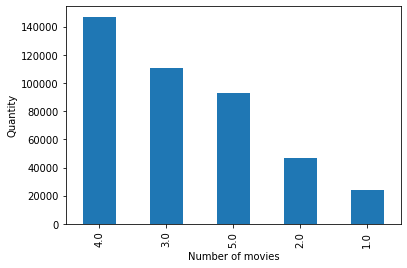

In [38]:
df_d['Rating'].value_counts().plot.bar()
plt.xlabel('Number of movies')
plt.ylabel('Quantity')

observations -
1. Mostly users prefered to give rating 4/5
2. About 250000 movies have rating 5/5
3. Only 50000+ movies have rating 1/5

Text(0.5, 0, 'Age')

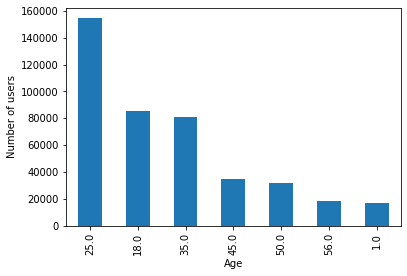

In [39]:
df_d['Age'].value_counts().plot.bar()
plt.ylabel('Number of users')
plt.xlabel('Age')

Observations - 
1. Approxx~420000K users are 25 years old
2. Intrestingly, more than 10000 are 1 year old kiddo also watch movies

Text(0.5, 0, 'Gender')

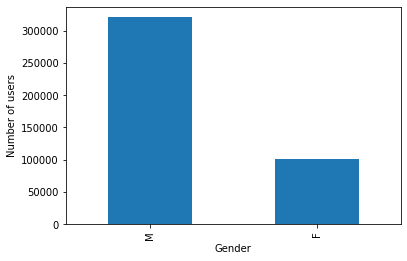

In [40]:
df_d['Gender'].value_counts().plot.bar()
plt.ylabel('Number of users')
plt.xlabel('Gender')

Observation -
The quantity of male users are approx more than 2 times the quantity of female usres

In [41]:
# Need to be label encoded because it help in histograph to categories in a particular range
le = LabelEncoder()
df_d['enc_Genres'] = le.fit_transform(df_d['Genres'])
df_d.groupby(['Genres','enc_Genres']).size().reset_index().rename(columns={0:'count'})  #301 is total number of unique Genres 

,Genres,enc_Genres,count
0,Action,0,5087
1,Action|Adventure,1,4257
2,Action|Adventure|Animation,2,192
3,Action|Adventure|Animation|Children's|Fantasy,3,68
4,Action|Adventure|Animation|Horror|Sci-Fi,4,230
...,...,...,...
296,Sci-Fi|Thriller|War,296,119
297,Sci-Fi|War,297,555
298,Thriller,298,7120
299,War,299,407


Text(0.5, 0, 'Label encoded Genre')

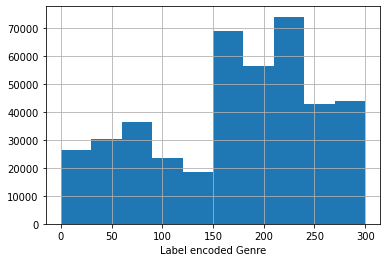

In [42]:
df_d['enc_Genres'].hist()
plt.xlabel('Label encoded Genre')

Observations - 
1. Encoded Genres =[210 to 240] are highly watched approx~190000
*Below i mentioned these encoded genres*


In [43]:
for i in range(210,240):
  m=df_d.loc[df_d['enc_Genres']== (i)][['Genres', 'enc_Genres']].head(1)
  print('/n')
  print(m)

/n
                   Genres  enc_Genres
74413  Comedy|Romance|War         210
/n
             Genres  enc_Genres
9983  Comedy|Sci-Fi         211
/n
                       Genres  enc_Genres
222541  Comedy|Sci-Fi|Western         212
/n
                Genres  enc_Genres
75446  Comedy|Thriller         213
/n
            Genres  enc_Genres
180321  Comedy|War         214
/n
               Genres  enc_Genres
86921  Comedy|Western         215
/n
       Genres  enc_Genres
114157  Crime         216
/n
            Genres  enc_Genres
27266  Crime|Drama         217
/n
                       Genres  enc_Genres
263776  Crime|Drama|Film-Noir         218
/n
                               Genres  enc_Genres
53037  Crime|Drama|Film-Noir|Thriller         219
/n
                     Genres  enc_Genres
158357  Crime|Drama|Mystery         220
/n
                              Genres  enc_Genres
259481  Crime|Drama|Mystery|Thriller         221
/n
                     Genres  enc_Genres
306326  Crime|Drama|R

In [44]:
#Since there are 3706 Movie Title so imposible to show with histograph 
# so first we will encode it by using Label encoder as i did above
len(df_d['Title'].unique())

3606

In [45]:
le = LabelEncoder()
df_d['enc_Title'] = le.fit_transform(df_d['Title'])
df_d.groupby(['Title','enc_Title']).size().reset_index().rename(columns={0:'count'})

,Title,enc_Title,count
0,"$1,000,000 Duck (1971)",0,20
1,'Night Mother (1986),1,24
2,'Til There Was You (1997),2,29
3,"'burbs, The (1989)",3,124
4,...And Justice for All (1979),4,73
...,...,...,...
3601,"Zed & Two Noughts, A (1985)",3601,10
3602,Zero Effect (1998),3602,145
3603,Zero Kelvin (Kj�rlighetens kj�tere) (1995),3603,1
3604,Zeus and Roxanne (1997),3604,14


Text(0.5, 0, 'Label encoded title')

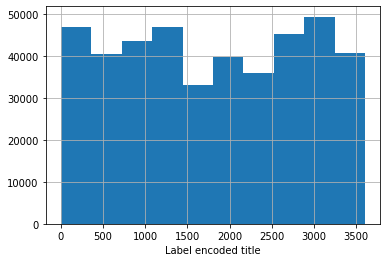

In [46]:
df_d['enc_Title'].hist()
plt.xlabel('Label encoded title')

observations -
1. Movie Title encoded between (2850 to 3350)comes are highly watched(mentioned below)(approx~130000)

In [47]:
for i in range(2850,3350):
  p=df_d.loc[df_d['enc_Title']== (i)][['Title', 'enc_Title']].head(1)
  print('/n')
  print(p)

/n
                                      Title  enc_Title
421428  See the Sea (Regarde la mer) (1997)       2850
/n
                Title  enc_Title
256726  Selena (1997)       2851
/n
                               Title  enc_Title
142936  Sense and Sensibility (1995)       2852
/n
                   Title  enc_Title
414584  Senseless (1998)       2853
/n
                                         Title  enc_Title
420541  Separation, The (La S�paration) (1994)       2854
/n
                    Title  enc_Title
285368  Serial Mom (1994)       2855
/n
                Title  enc_Title
61669  Serpico (1973)       2856
/n
                                                 Title  enc_Title
279962  Sesame Street Presents Follow That Bird (1985)       2857
/n
                    Title  enc_Title
398636  Set It Off (1996)       2858
/n
                      Title  enc_Title
99659  Seven (Se7en) (1995)       2859
/n
                                                   Title  enc_Title
352333  Seven B

In [48]:
df_d.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'MovieID',
       'Rating', 'Timestamp', 'Title', 'Genres', 'enc_Genres', 'enc_Title'],
      dtype='object')

Bivariate analysis 

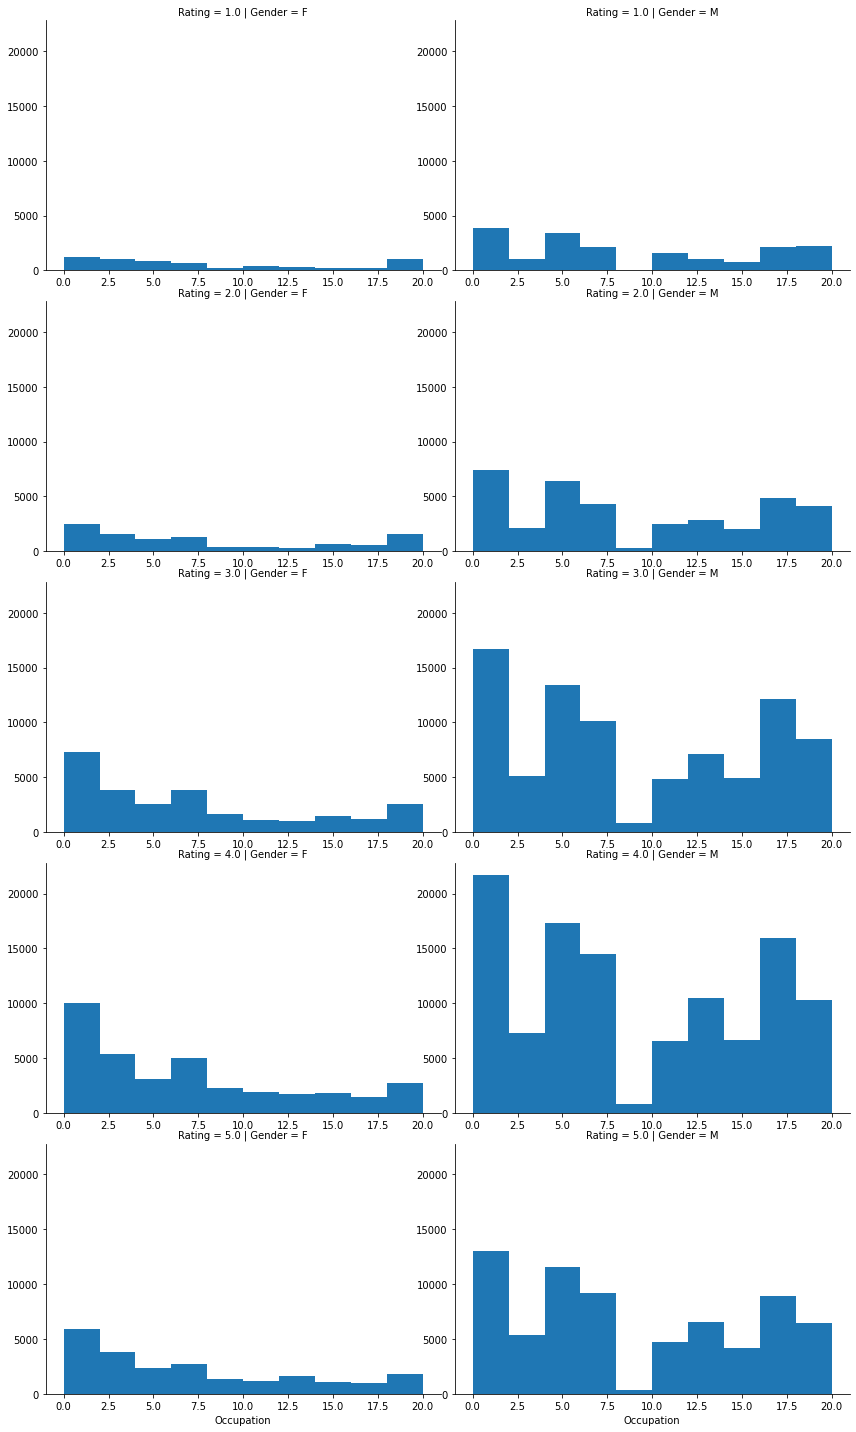

In [75]:
fn = ss.FacetGrid(df_d,col='Gender',row='Rating' ,height=4, aspect=1.5,gridspec_kws={"width_ratios": [4, 4]})
fn = fn.map(plt.hist,"Occupation")
for ax in fn.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft = True)

observations -
1. Peoples having occupation -Executive/managerial, farmer,homemaker,k-12 student are not showing good interest in watching movies(watch least movies by these category)

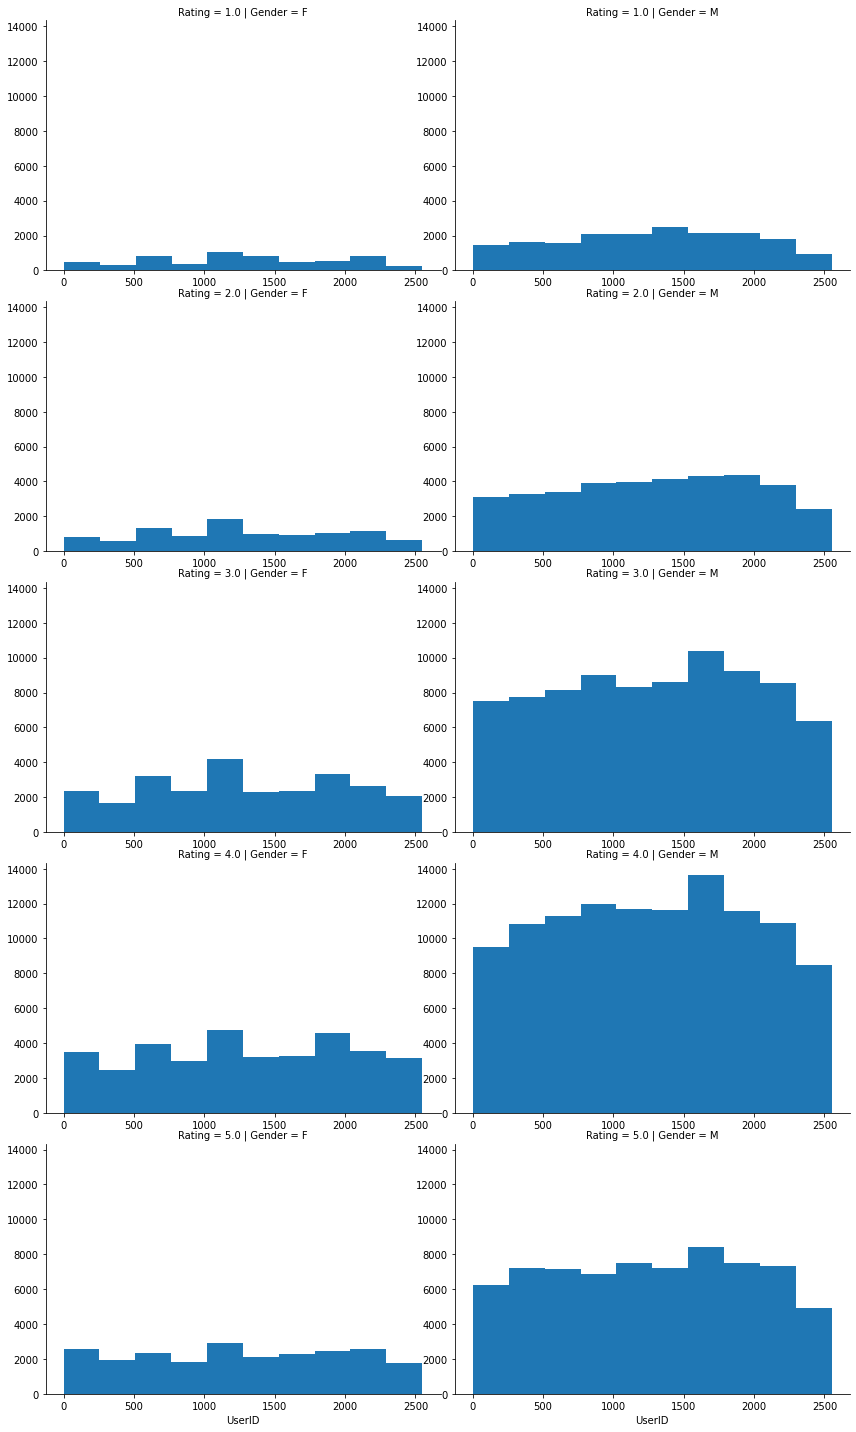

In [74]:
fn = ss.FacetGrid(df_d,col='Gender',row='Rating' ,height=4, aspect=1.5,gridspec_kws={"width_ratios": [4, 4]})
fn = fn.map(plt.hist,"UserID")
for ax in fn.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft = True)

Observations -
1. Mostly number of users are male and give rating 4/5
2. Comparison with male users, Female users watch less movies 
3. approx 430 are the felmale users having userID under 1.0 to 600.0 rated movies 5/5 

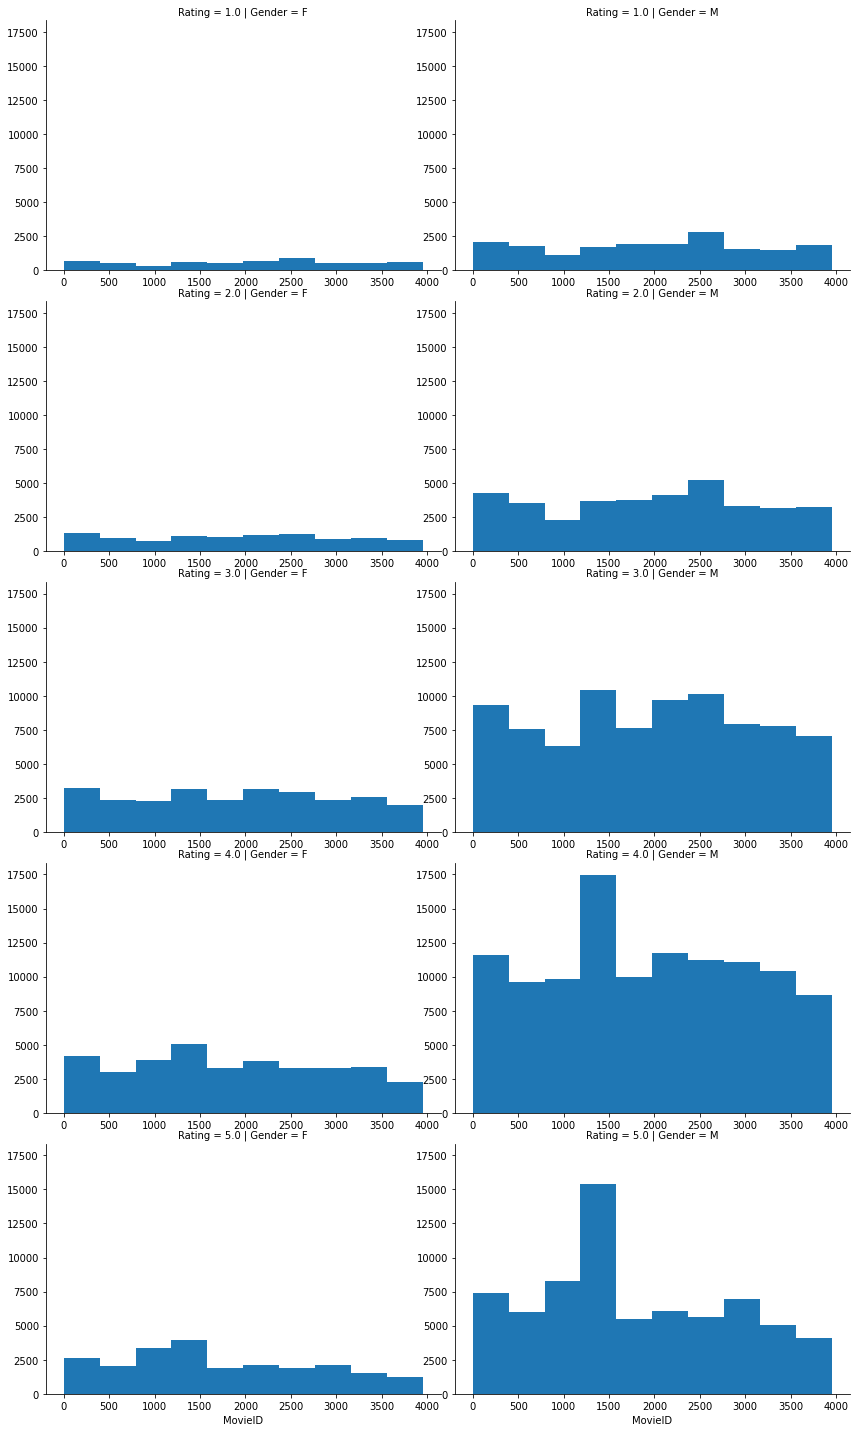

In [73]:
fn = ss.FacetGrid(df_d,col='Gender',row='Rating' ,height=4, aspect=1.5,gridspec_kws={"width_ratios": [4, 4]})
fn = fn.map(plt.hist,"MovieID")
for ax in fn.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft = True)

observations -
1. Around 4500+ movies are rated 4/5 by male users
2. Around 40000 movies are rated 5/5 by male users
3. maximum number of movies(mostly) are rated 4/5 by male users

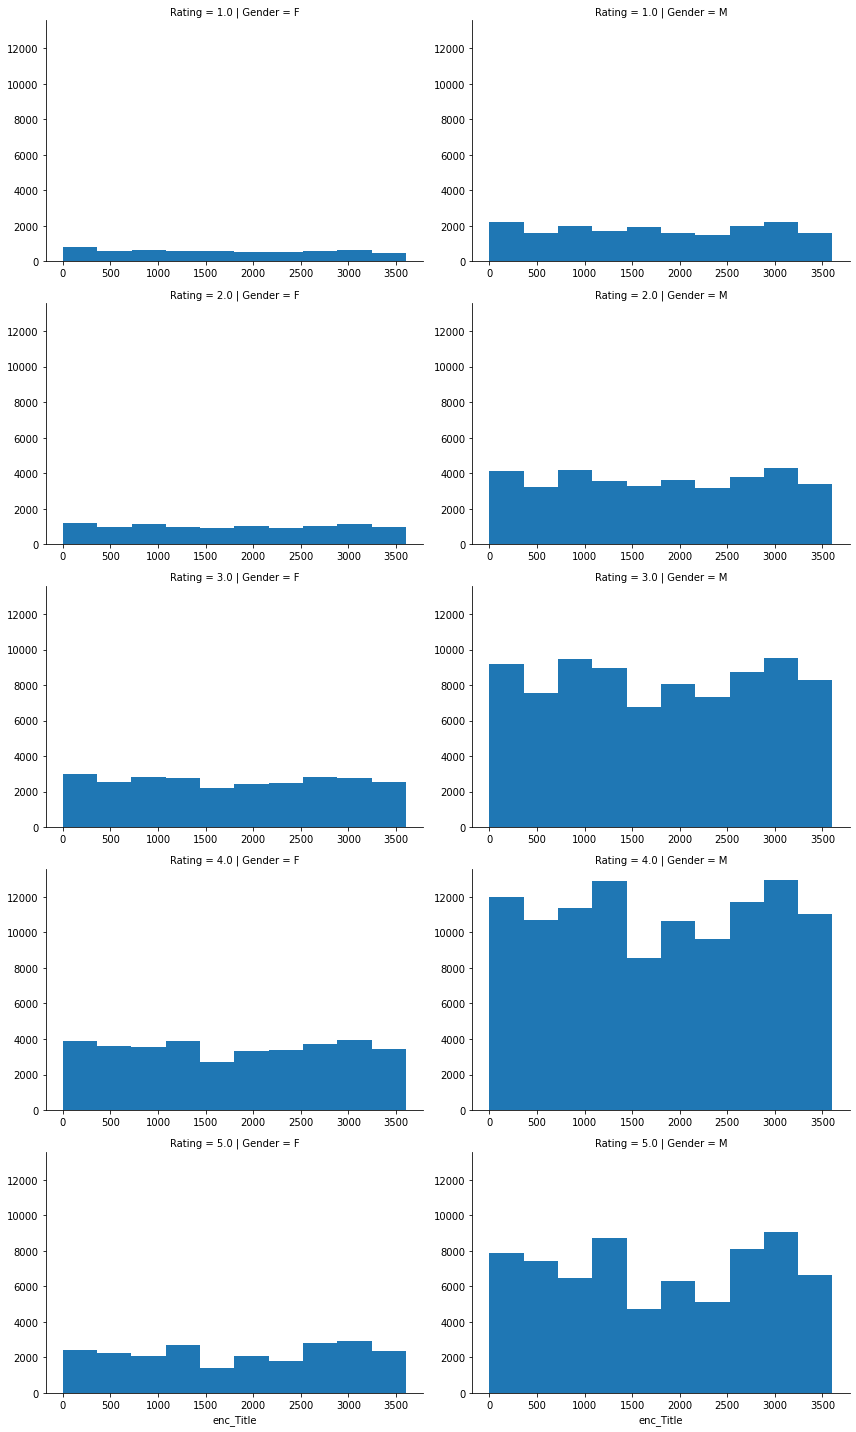

In [53]:
fn = ss.FacetGrid(df_d,col='Gender',row='Rating' ,height=4, aspect=1.5,gridspec_kws={"width_ratios": [4, 4]})
for ax in fn.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft = True)
fn = fn.map(plt.hist,"enc_Title")

observations-
About 100000+  male users takes 1.0s(in le9) to rate 4/5 a particular movie 

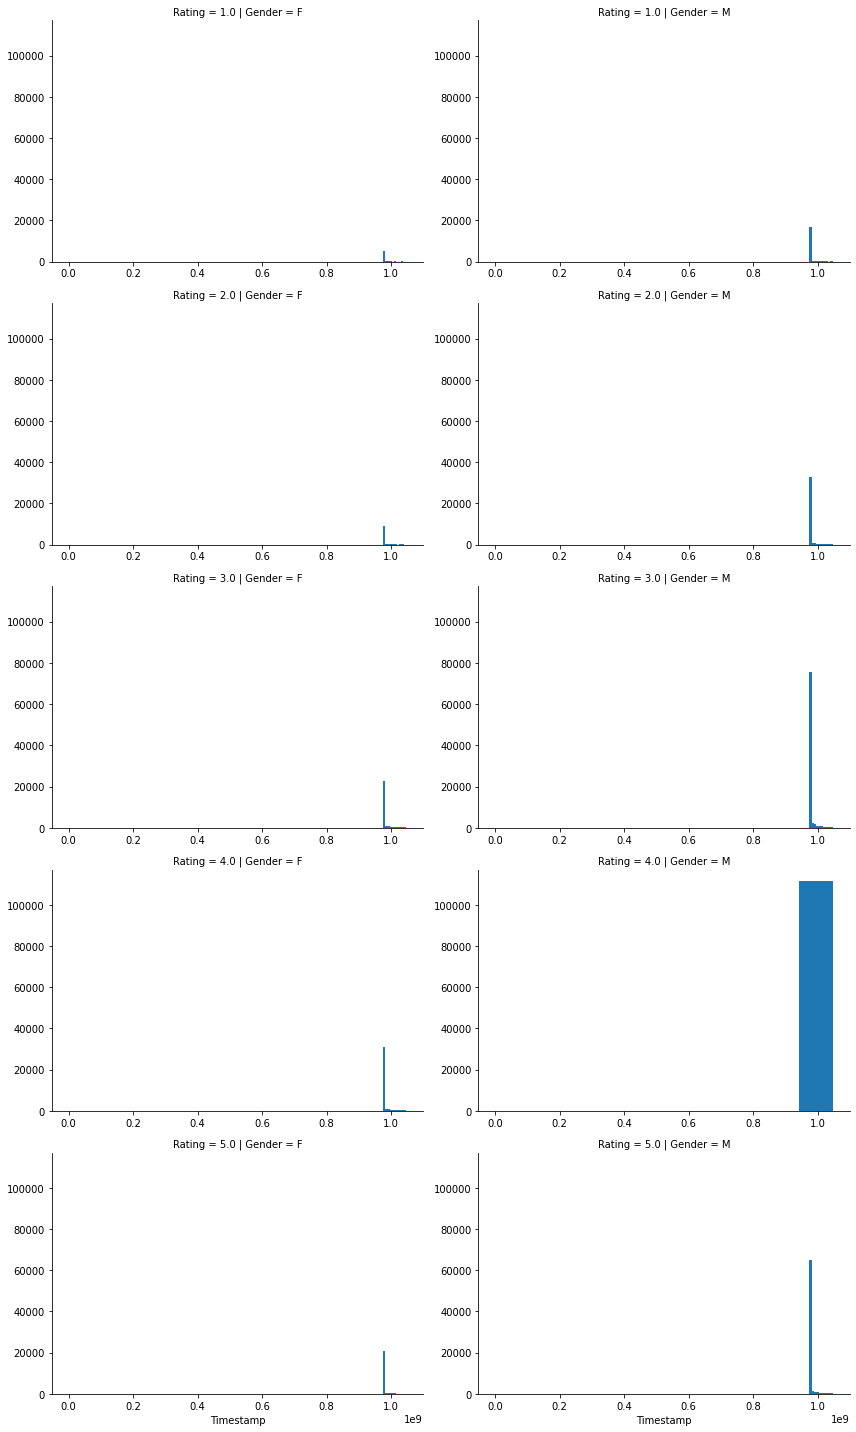

In [57]:
fn = ss.FacetGrid(df_d,col='Gender',row='Rating' ,height=4, aspect=1.5,gridspec_kws={"width_ratios": [4, 4]})
for ax in fn.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft = True)
fn = fn.map(plt.hist,"Timestamp")

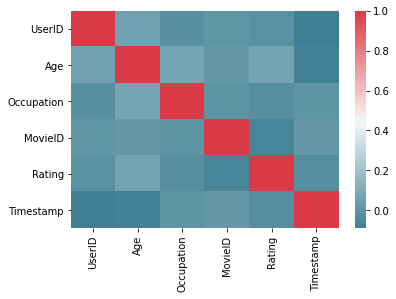

In [65]:
#Correlation between each feature by using seamap Heatmap function
corr = df_d.loc[:,df_d.dtypes == 'float64'].corr()
ss.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=ss.diverging_palette(220, 10, as_cmap=True))

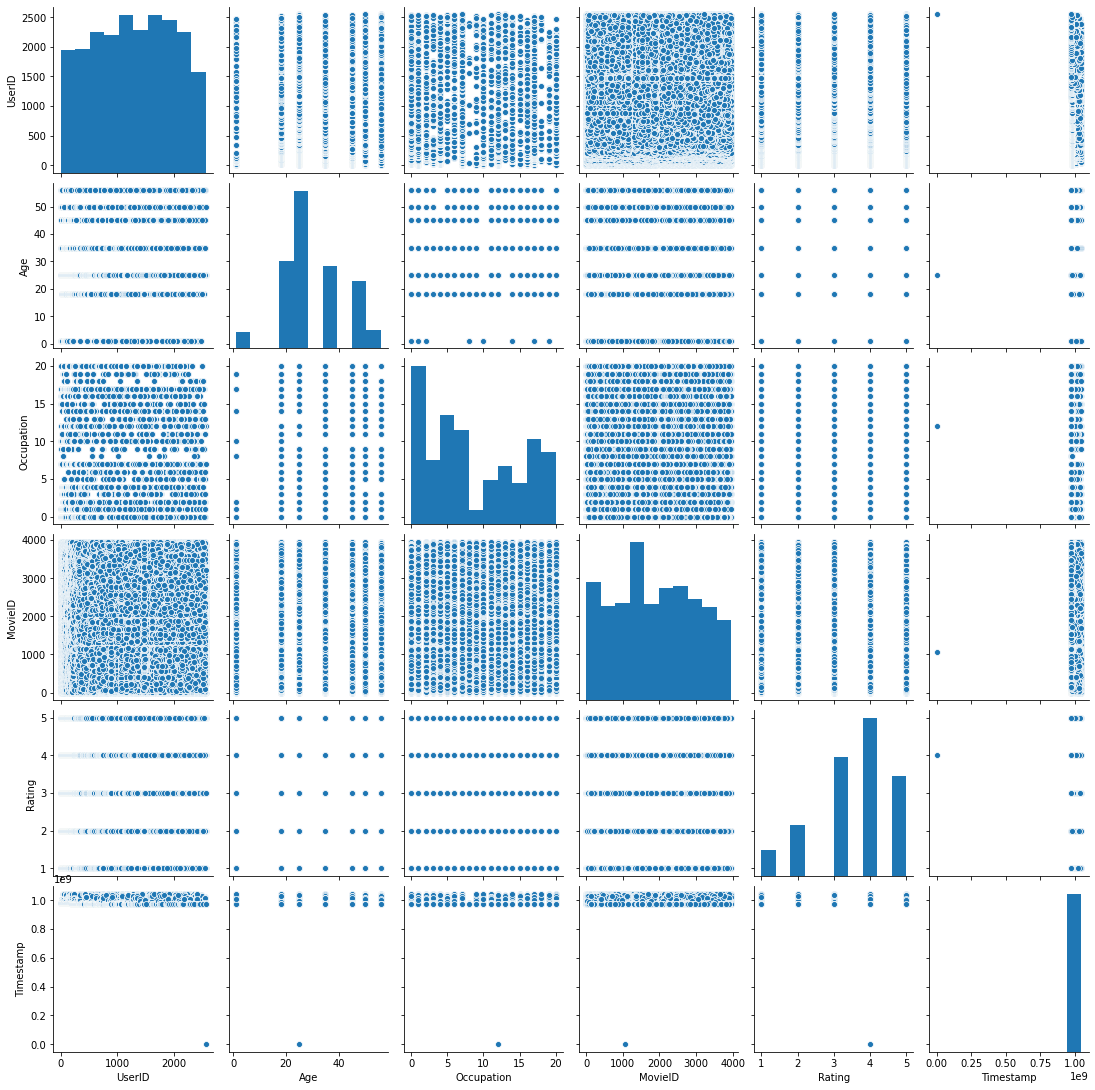

In [60]:
ss.pairplot(df_d.loc[:,df_d.dtypes == 'float64'])

observations -
1. Around 32000 times movie(label_encoded between 1100 to 1400) watched by male with rating 4/5

**Top 25 Popular movies - This will be helpfull in Popularity based recommendation system**

In [67]:
# Top 25 rated movies 
# American Beauty is most watched movies 
most_rated = df_d.groupby('Title').size().sort_values(ascending=False)
most_rated.head(25)

Title
American Beauty (1999)                                   1531
Jurassic Park (1993)                                     1233
Star Wars: Episode IV - A New Hope (1977)                1229
Star Wars: Episode V - The Empire Strikes Back (1980)    1229
Star Wars: Episode VI - Return of the Jedi (1983)        1196
Terminator 2: Judgment Day (1991)                        1176
Men in Black (1997)                                      1145
Saving Private Ryan (1998)                               1139
Braveheart (1995)                                        1115
Matrix, The (1999)                                       1074
Silence of the Lambs, The (1991)                         1055
Raiders of the Lost Ark (1981)                           1021
Back to the Future (1985)                                1014
Fargo (1996)                                             1003
Shakespeare in Love (1998)                                989
Schindler's List (1993)                                   986
L.

**Top 25 least Popular movies - This will be helpfull in Popularity based recommendation system**

In [68]:
least_rated = df_d.groupby('Title').size().sort_values(ascending=False)
least_rated.tail(25)

Title
Blood Spattered Bride, The (La Novia Ensangrentada) (1972)            1
Windows (1980)                                                        1
Fausto (1993)                                                         1
Back Stage (2000)                                                     1
Possession (1981)                                                     1
Pot O' Gold (1941)                                                    1
Baby, The (1973)                                                      1
Power 98 (1995)                                                       1
War at Home, The (1996)                                               1
Jeanne and the Perfect Guy (Jeanne et le gar�on formidable) (1998)    1
Choices (1981)                                                        1
Autopsy (Macchie Solari) (1975)                                       1
August (1996)                                                         1
Telling You (1998)                                        

3. **Feature Engineering on dataset**

remove non relevant feature from our dataset

In [69]:
df_d.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code', 'MovieID',
       'Rating', 'Timestamp', 'Title', 'Genres', 'enc_Genres', 'enc_Title'],
      dtype='object')

So after the filtration of null values and outliers, we have 10 features(mainly) for this dataset and these can be grouped as--
1. UserID related features - UserID, Gender, Age , Occupation , Zip-code,Timestamp  
2. ProductID related features - MovieID , Rating , Title, Genres

In this short context(60% of user related features and 40% of product related feature) we observed that all the features are relevant in Product side as we visulaised already but One column in userID features called Timestamp which doesn't show any importance in our dataset(recommendation on the basis of the criteria that how much a user takes time to rate a particular movie)is senseless.
In Timestamp feature values are not well distributed (since most of the user comes under a particular value) so by considering this feature in model will result a bias recommendation system 

---



In [71]:
dropped_data = df_d.drop(columns='Timestamp')
dropped_data

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Title,Genres,enc_Genres,enc_Title
0,1.0,F,1.0,10.0,48067,1193.0,5.0,One Flew Over the Cuckoo's Nest (1975),Drama,239,2385
1,2.0,M,56.0,16.0,70072,1193.0,5.0,One Flew Over the Cuckoo's Nest (1975),Drama,239,2385
2,12.0,M,25.0,12.0,32793,1193.0,4.0,One Flew Over the Cuckoo's Nest (1975),Drama,239,2385
3,15.0,M,25.0,7.0,22903,1193.0,4.0,One Flew Over the Cuckoo's Nest (1975),Drama,239,2385
4,17.0,M,50.0,1.0,95350,1193.0,5.0,One Flew Over the Cuckoo's Nest (1975),Drama,239,2385
...,...,...,...,...,...,...,...,...,...,...,...
421917,2344.0,M,25.0,12.0,2139,790.0,3.0,An Unforgettable Summer (1994),Drama,239,152
421918,2440.0,M,50.0,17.0,1430,1915.0,4.0,Voyage to the Beginning of the World (1997),Drama,239,3441
421919,2453.0,M,25.0,7.0,55429,2833.0,4.0,Lucie Aubrac (1997),Romance|War,292,1967
421920,2507.0,M,25.0,4.0,94107,1714.0,2.0,Never Met Picasso (1996),Romance,290,2278
